# X Account Data
### for @bodhichristian

This notebook is an exploration of X user and post data using pandas, numpy, and matplotlib to gain useful insights.

CSVs in current directory:  
- <b>account_overview_year.csv</b> - 365 days of account-related data such as Likes, New follows, and Profile visits  
- <b>account_content_quarter.csv</b> - 3 months of post-related data such as Post Id, Post text, and Engagements  

In [168]:
## Imports

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [169]:
## Create dataframes
overview = pd.read_csv('account_overview_year.csv')
posts = pd.read_csv('posts_3M.csv')

# Account Overview (Previous 365 Days)

In [170]:
overview.head(2)

,Date,Impressions,Likes,Engagements,Bookmarks,Shares,New follows,Unfollows,Replies,Reposts,Profile visits,Create Post,Video views,Media views
0,"Mon, Feb 24, 2025",640,3,8,0,0,0,0,0,0,1,0,0,0
1,"Sun, Feb 23, 2025",1951,9,51,2,0,1,1,6,0,12,2,0,0


### Clean dates

In [171]:
# %a - abbreviated weekday name ('Mon')
# %b - abbreviated month name ('Feb')
# %d - day of the month ('25')
# %Y - four digit year (2025)

overview['Date'] = pd.to_datetime(overview['Date'], format='%a, %b %d, %Y')
overview['Month'] = pd.Categorical(
    overview['Date'].dt.strftime('%b'),
    categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    ordered=True
)
overview.head(2)

,Date,Impressions,Likes,Engagements,Bookmarks,Shares,New follows,Unfollows,Replies,Reposts,Profile visits,Create Post,Video views,Media views,Month
0,2025-02-24,640,3,8,0,0,0,0,0,0,1,0,0,0,Feb
1,2025-02-23,1951,9,51,2,0,1,1,6,0,12,2,0,0,Feb


## Engagement

In [172]:
total_impressions = overview['Impressions'].sum()
total_engagements = overview['Engagements'].sum()

engagement_rate = round((total_engagements / total_impressions * 100), 1)
print(f'Impressions: {total_impressions}')
print(f'Engagements: {total_engagements}')
print(f'Engagement rate: {engagement_rate}%')

Impressions: 1263207
Engagements: 53857
Engagement rate: 4.3%


### Avg Daily Engagement

In [205]:
avg_daily_engagement = (overview['Engagements'] / overview['Impressions']).mean() * 100
print(f'Average daily engagment: {avg_daily_engagement.round(1)}')

Average daily engagment: 3.8


### Monthly Engagement

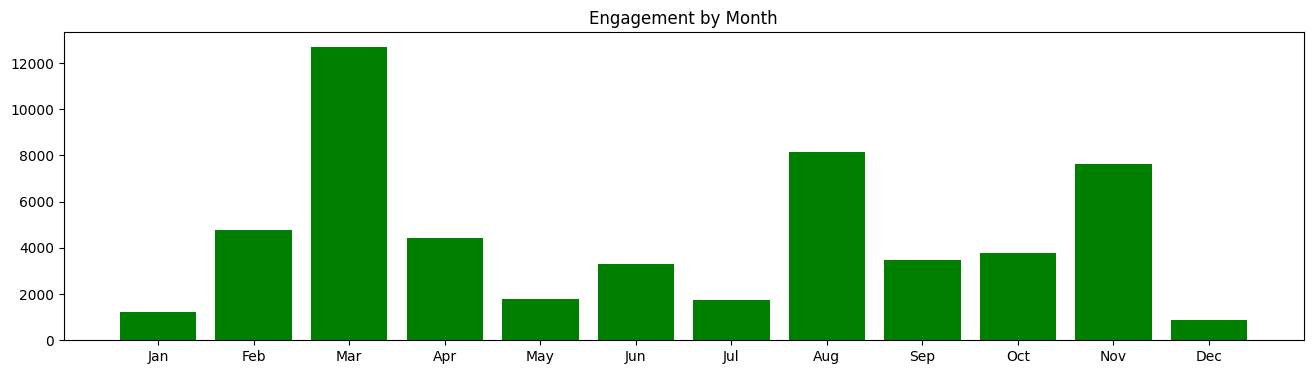

In [174]:
monthly_engagements = overview.groupby('Month', observed=True)['Engagements'].sum()

plt.figure(figsize=(16, 4))  
plt.title('Engagement by Month')
plt.bar(monthly_engagements.index, monthly_engagements.values, color='green')
plt.show()

### Monthly Impresssions

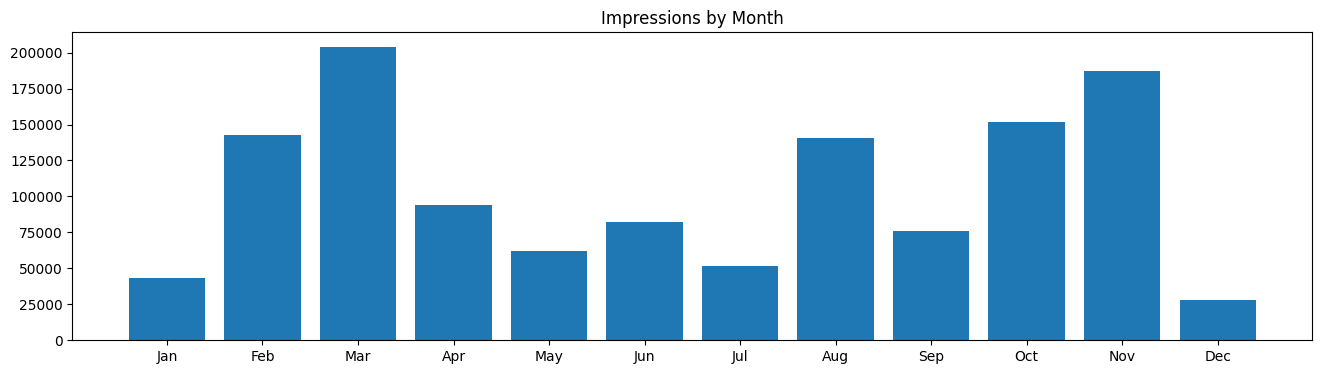

In [175]:
monthly_impressions = overview.groupby('Month', observed=True)['Impressions'].sum()

plt.figure(figsize=(16, 4))  
plt.title('Impressions by Month')
plt.bar(monthly_impressions.index, monthly_impressions.values)
plt.show()

### Posts vs Replies Receieved

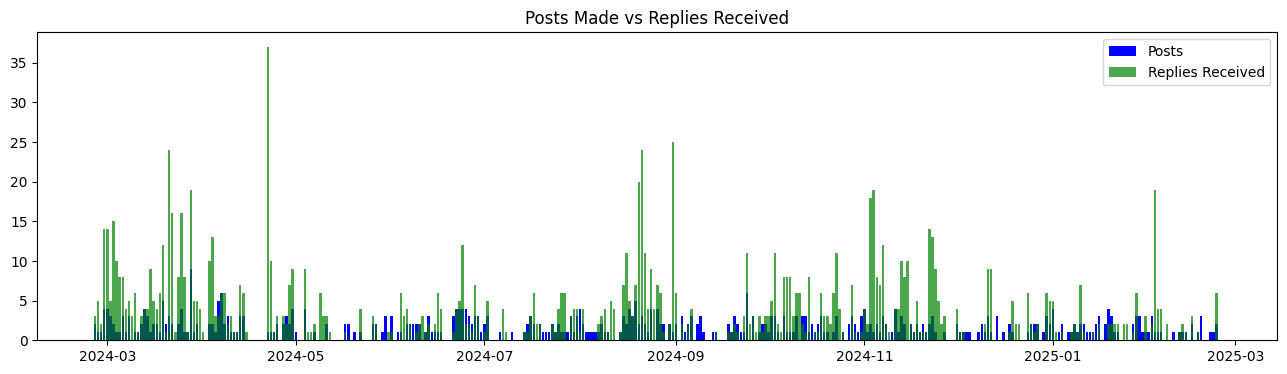

In [176]:
x = overview['Date']
y_posts = overview['Create Post']
y_replies = overview['Replies']

plt.figure(figsize=(16,4))
plt.title('Posts Made vs Replies Received')
plt.bar(x, y_posts, color='blue', label='Posts')
plt.bar(x, y_replies, color='green', alpha=0.7, label='Replies Received')
plt.legend()
plt.show()

### Profile Visist

In [177]:
profile_visits = overview['Profile visits'].sum()
print(f'Profile Visits: {profile_visits}')

Profile Visits: 6043


In [178]:
avg_daily_visits = round((profile_vists / 365), 1)
print(f'Average Daily Profile Vists: {avg_daily_visits}')

Average Daily Profile Vists: 16.6


### Post Data Overview

In [179]:
replies = overview['Replies'].sum()
likes = overview['Likes'].sum()
reposts = overview['Reposts'].sum()
bookmarks = overview['Bookmarks'].sum()
shares = overview['Shares'].sum()

print(f'Replies: {replies}')
print(f'Likes: {likes}')
print(f'Reposts: {reposts}')
print(f'Bookmarks: {bookmarks}')
print(f'Shares: {shares}')

Replies: 1210
Likes: 11656
Reposts: 397
Bookmarks: 4582
Shares: 156


### Net Daily Follower Change

In [180]:
net_follower_change = overview['New follows'] - overview['Unfollows']
print(f'Largest follower increase: {net_follower_change.max()}')
print(f'Largest follower decrease: {net_follower_change.min()}')
print(f'Average daily change: {net_follower_change.mean().round(2)}')

Largest follower increase: 94
Largest follower decrease: -5
Average daily change: 3.98


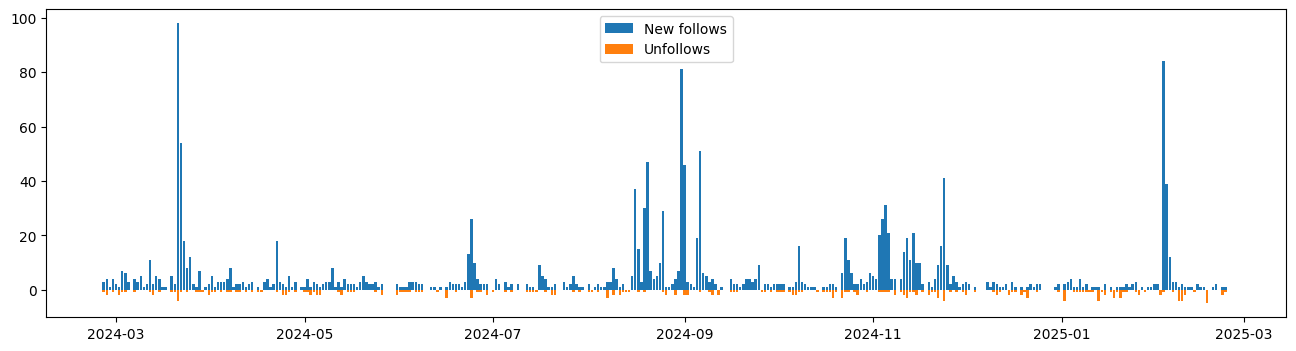

In [207]:
x = overview['Date']
y_follows = overview['New follows']
y_unfollows = (0 -overview['Unfollows'])

plt.figure(figsize=(16, 4))

plt.bar(x, y_follows, label='New follows')
plt.bar(x, y_unfollows, label='Unfollows')

plt.title('Follows and Unfollows')
plt.xlabel('')
plt.legend()
plt.show()

# Posts (Previous 3 Months)

In [181]:
posts.head(2)

,Post id,Date,Post text,Link,Impressions,Likes,Engagements,Bookmarks,Share,New follows,Replies,Reposts,Profile visits,Detail expands,Url clicks,Hashtag clicks,Permalink clicks
0,1894144221424026012,Mon Feb 24 2025,@KevinNaughtonJr it’s an acronym?,https://x.com/bodhichristian/status/1894144221...,409,0,2,0,0,0,0,0,1,1,0,0,0
1,1894097177032458244,Mon Feb 24 2025,@OrdinaryInds https://t.co/10czV0rjBF,https://x.com/bodhichristian/status/1894097177...,11,1,1,0,0,0,0,0,0,0,0,0,0


### Clean dates

In [182]:
# %a - abbreviated weekday name ('Mon')
# %b - abbreviated month name ('Feb')
# %d - day of the month ('25')
# %Y - four digit year (2025)

posts['Date'] = pd.to_datetime(overview['Date'], format='%a, %b %d, %Y')
posts['Weekday'] = pd.Categorical(
    posts['Date'].dt.strftime('%a'),
    categories=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'],
    ordered=True
)

posts.head(2)

,Post id,Date,Post text,Link,Impressions,Likes,Engagements,Bookmarks,Share,New follows,Replies,Reposts,Profile visits,Detail expands,Url clicks,Hashtag clicks,Permalink clicks,Weekday
0,1894144221424026012,2025-02-24,@KevinNaughtonJr it’s an acronym?,https://x.com/bodhichristian/status/1894144221...,409,0,2,0,0,0,0,0,1,1,0,0,0,Mon
1,1894097177032458244,2025-02-23,@OrdinaryInds https://t.co/10czV0rjBF,https://x.com/bodhichristian/status/1894097177...,11,1,1,0,0,0,0,0,0,0,0,0,0,Sun


### Post Data

In [183]:
total_posts = len(posts)
monthly_average = round((total_posts / 3))
print(f'{total_posts} posts over the last 90 days, averaging ~{monthly_average} posts monthly')

250 posts over the last 90 days, averaging ~83 posts monthly


### Posts by Weekday

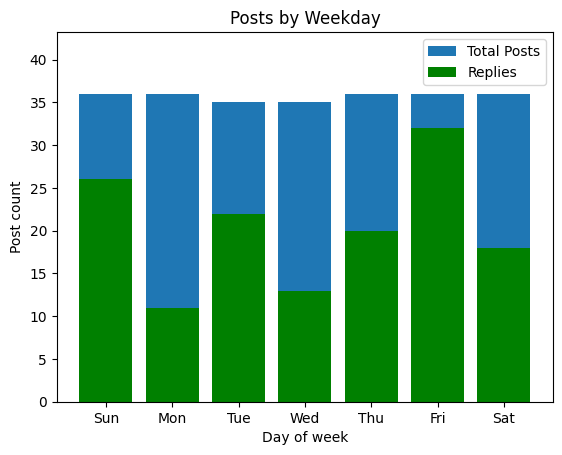

In [200]:
posts_by_weekday = posts.groupby('Weekday', observed=True).size()
replies_by_weekday = posts.groupby('Weekday', observed=True)['Replies'].sum()

plt.bar(posts_by_weekday.index, posts_by_weekday.values, label='Total Posts')
plt.bar(replies_by_weekday.index, replies_by_weekday.values, color='green', label='Replies')

plt.xlabel('Day of week')
plt.ylabel('Post count')
plt.title('Posts by Weekday')

plt.ylim(0, (posts_by_weekday.max() * 1.2))  # 20% buffer for better visibility

plt.legend()
plt.show()

In [185]:
total_bookmarks = posts['Bookmarks'].sum()
print(f'Users bookmarked your posts {total_bookmarks} times')

Users bookmarked your posts 848 times


In [186]:
total_profile_visits = posts['Profile visits'].sum()
print(f'Your posts brought {total_profile_visits} visits to your profile.')

Your posts brought 720 visits to your profile.


In [187]:
total_likes = posts['Likes'].sum()
avg_likes = total_likes / len(posts)
print(f'Your posts received an average of {avg_likes} likes.')

Your posts received an average of 7.212 likes.


In [188]:
top_post_text = posts[posts['Likes'] == posts['Likes'].max()]['Post text'].values[0]
print(f'Top post of the last 90 days: \n{top_post_text}')

Top post of the last 90 days: 
decided it’s time to learn app intents. rigged up a simple use case with two intents, and exposed them to the system as a shortcut. code in replies ⬇️ https://t.co/jxXGOPH18r


In [189]:
op_posts = posts.copy()
op_posts = op_posts[~op_posts['Post text'].str.startswith('@')]
op_posts['word_count'] = op_posts['Post text'].str.split().str.len()
max = op_posts['word_count'].max()
most_verbose_post = op_posts[op_posts['word_count'] == max]['Post text'].values[0]
print(f'Most verbose post of the last 90 days: \n{most_verbose_post}')
print(f'Word count: {max}')

Most verbose post of the last 90 days: 
had my first live coding interview today. not as great as i would’ve liked, but not as bad as it could have been. was tasked with building Conway’s Game of Life to simulate cell survival based on the state of neighboring cells. struggled with the 2D array logic checks, and https://t.co/gQfTreqJbw
Word count: 51


### Reply data

In [190]:
replies = posts['Post text'].str.startswith('@').sum()
total_posts = len(posts)
reply_rate = (replies / total_posts * 100).round(2)
print(f'Replies account for {reply_rate}% of all posts')

Replies account for 51.2% of all posts


In [191]:
replies_df = posts[posts['Post text'].str.startswith('@')]
grouped_replies = replies_df.groupby(posts['Post text'].str.split().str[0]).size()
most_replied = grouped_replies.idxmax()
print(f'{most_replied} has received the most replies')

@OrdinaryInds has received the most replies
